In [1]:
import pandas as pd

data = pd.read_csv('data.csv')


In [2]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Week'] = data['Date'].dt.isocalendar().week
print("Primeras filas del dataset actualizado:")
print(data.head())


Primeras filas del dataset actualizado:
        Date  Week Line   Time     Day                Location  \
0 2024-01-01     1  505  02:45  Monday       DUNDAS AND MCCAUL   
1 2024-01-01     1  505  03:06  Monday   COLLEGE AND GLADSTONE   
2 2024-01-01     1  503  03:21  Monday  PARLIAMENT AND SHUTTER   
3 2024-01-01     1  505  03:53  Monday     DUNDAS WEST STATION   
4 2024-01-01     1  600  04:27  Monday      QUEEN AND BATHURST   

             Incident  Min Delay  Min Gap Bound  Vehicle  
0            Security         10       20     W     4416  
1  Emergency Services         52       72     E     4461  
2            Security          0        0     N     4545  
3            Security         37        0     W     4551  
4           Diversion         78       93     E     8116  


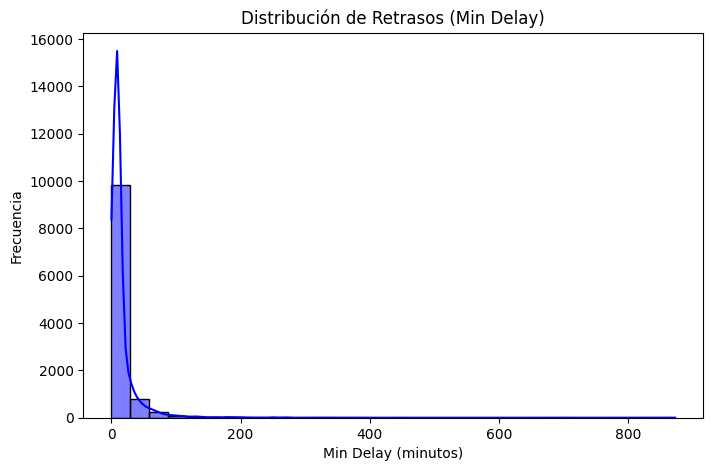

/var/folders/73/m50h3qv91_n45vnh3sfw1pb00000gq/T/ipykernel_1950/1031614820.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Day', order=data['Day'].value_counts().index, palette='viridis')


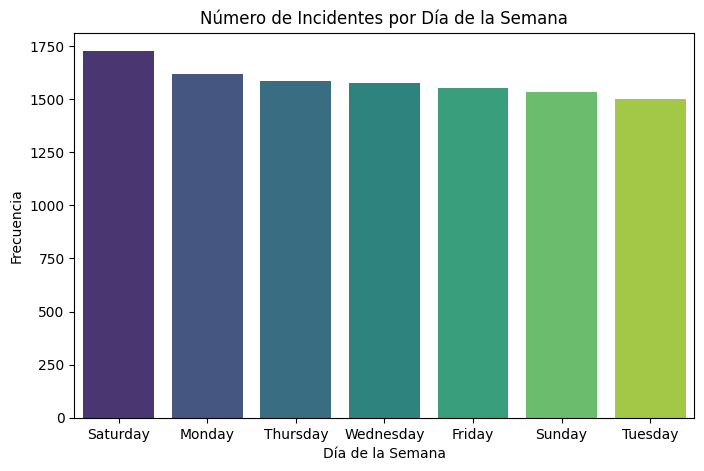

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de retrasos (Min Delay)
plt.figure(figsize=(8, 5))
sns.histplot(data['Min Delay'], bins=30, kde=True, color='blue')
plt.title('Distribución de Retrasos (Min Delay)')
plt.xlabel('Min Delay (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución por día de la semana
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Day', order=data['Day'].value_counts().index, palette='viridis')
plt.title('Número de Incidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()


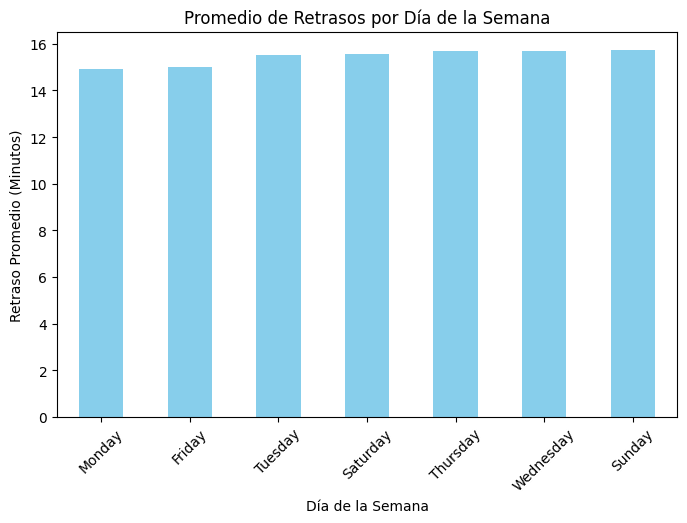

In [4]:
# Retrasos promedio por día
avg_delay_day = data.groupby('Day')['Min Delay'].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_delay_day.plot(kind='bar', color='skyblue')
plt.title('Promedio de Retrasos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso Promedio (Minutos)')
plt.xticks(rotation=45)
plt.show()


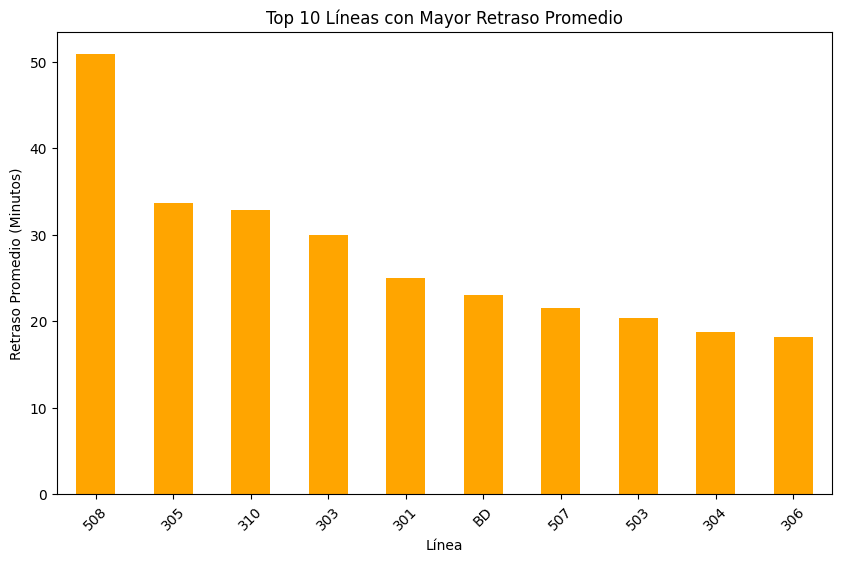

In [5]:
# Retrasos promedio por línea
avg_delay_line = data.groupby('Line')['Min Delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_delay_line.plot(kind='bar', color='orange')
plt.title('Top 10 Líneas con Mayor Retraso Promedio')
plt.xlabel('Línea')
plt.ylabel('Retraso Promedio (Minutos)')
plt.xticks(rotation=45)
plt.show()


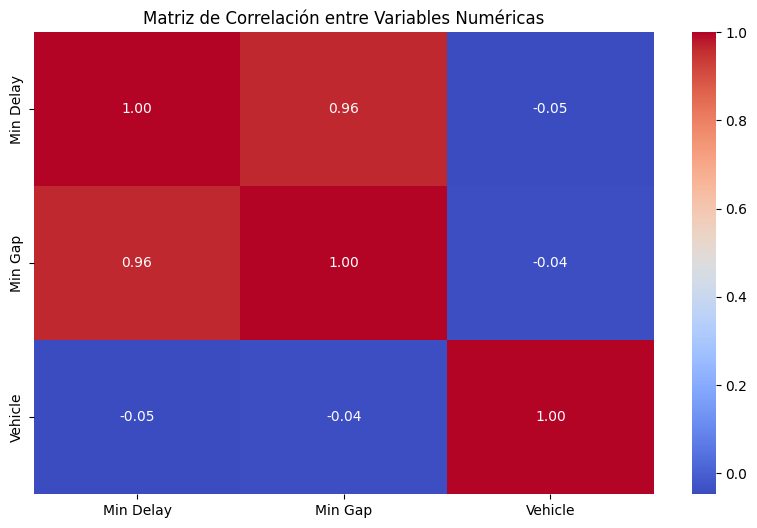


Correlaciones fuertes con 'Min Delay':
Min Delay    1.000000
Min Gap      0.963514
Vehicle     -0.047440
Name: Min Delay, dtype: float64


In [6]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular matriz de correlación solo para las columnas numéricas
correlation_matrix = data[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Mostrar las correlaciones fuertes con 'Min Delay'
print("\nCorrelaciones fuertes con 'Min Delay':")
print(correlation_matrix['Min Delay'].sort_values(ascending=False))


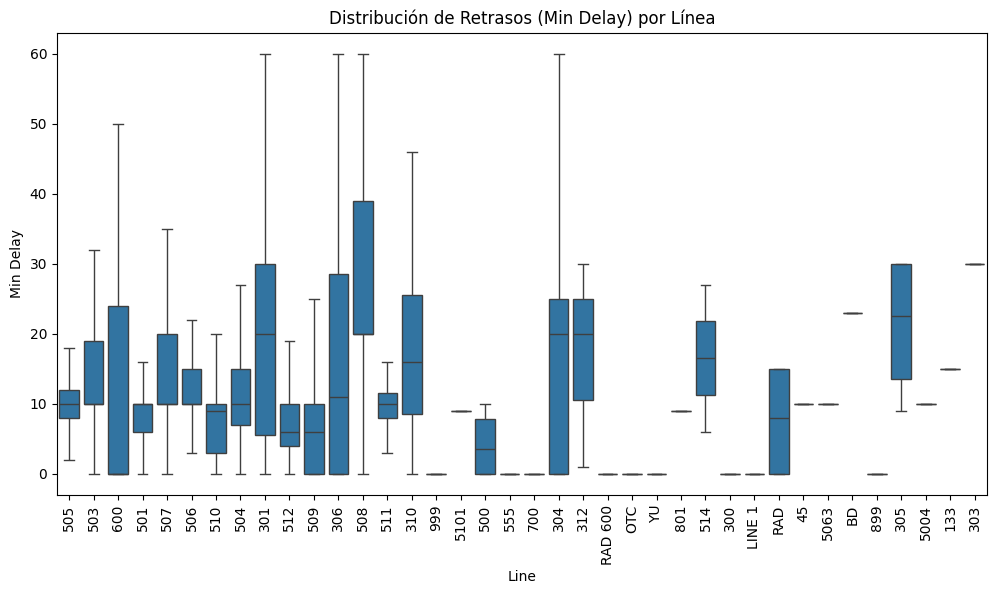

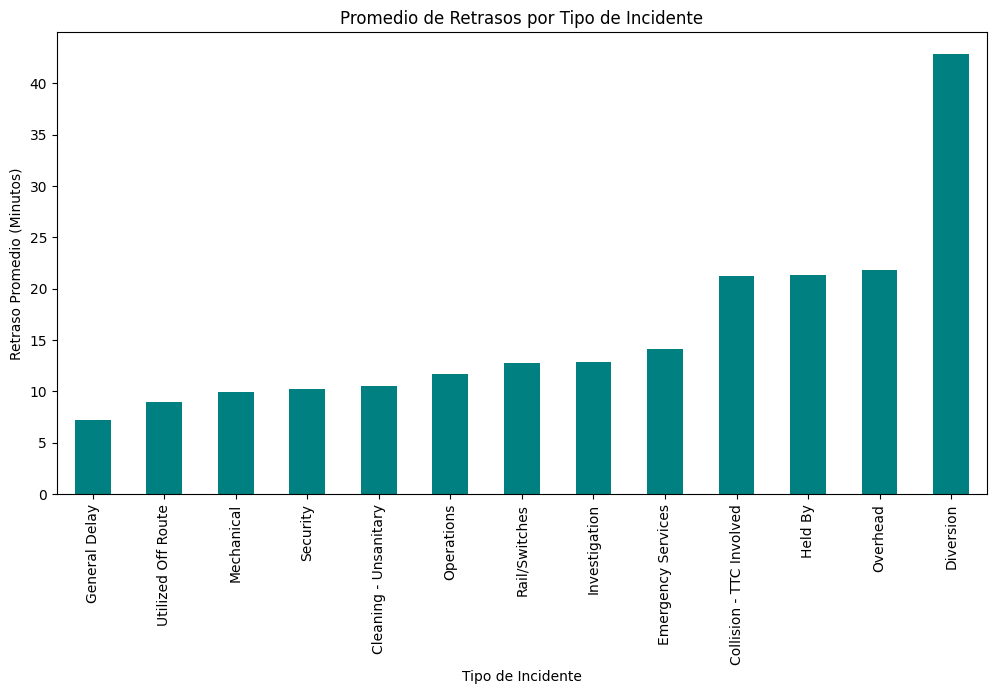

In [7]:
# Boxplot de Min Delay por Línea
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Line', y='Min Delay', showfliers=False)
plt.title('Distribución de Retrasos (Min Delay) por Línea')
plt.xticks(rotation=90)
plt.show()

# Retrasos promedio por Tipo de Incidente
avg_delay_incident = data.groupby('Incident')['Min Delay'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_delay_incident.plot(kind='bar', color='teal')
plt.title('Promedio de Retrasos por Tipo de Incidente')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Retraso Promedio (Minutos)')
plt.show()


In [8]:
# Save new dataFrame to a new CSV file
data.to_csv('data_updated.csv', index=False)
print("CSV file updated successfully.")

CSV file updated successfully.
